In [1]:
%pylab inline
import pymaster as nmt
import numpy as np
from scipy.stats import norm
import pyccl as ccl

Populating the interactive namespace from numpy and matplotlib


### Predictions from the simulations

In [2]:
e1,e2=np.load("e.npy")


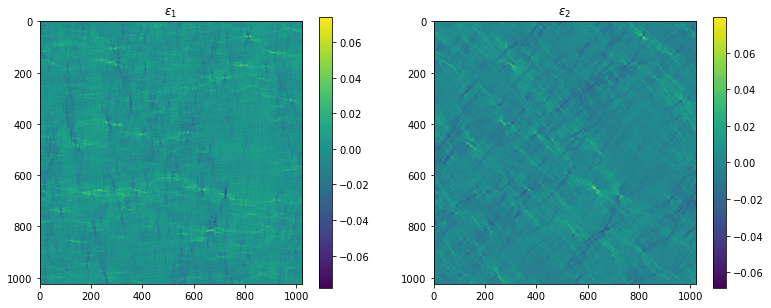

In [3]:
figure(figsize=[20,10])
subplot(131)
imshow(e1)
title('$\epsilon_1$')
colorbar(shrink=0.50)
subplot(132)
imshow(e2)
title('$\epsilon_2$')
colorbar(shrink=0.50)

In [4]:
Lx=5*np.pi/180
Ly=5*np.pi/180

In [5]:
Nx=1024
Ny=1024

In [6]:
f2=nmt.NmtFieldFlat(Lx,Ly,np.ones_like(e1),[e1,-e2])

In [7]:
l0_bins = np.arange(Nx/16) * 16 * np.pi/Lx
lf_bins = (np.arange(Nx/16)+1) * 16 * np.pi/Lx
b = nmt.NmtBinFlat(l0_bins, lf_bins)
# The effective sampling rate for these bandpowers can be obtained calling:
ells_uncoupled = b.get_effective_ells()

In [8]:
%%time
cl_22=nmt.compute_coupled_cell_flat(f2, f2, b)

CPU times: user 170 ms, sys: 0 ns, total: 170 ms
Wall time: 85.4 ms


### Theoretical predictions 

In [9]:
cosmo_ccl = ccl.Cosmology(
    Omega_c=0.2589, Omega_b=0.0486, 
    h=0.6774, sigma8 = 0.8159, n_s=0.9667, Neff=0,
    transfer_function='eisenstein_hu', matter_power_spectrum='halofit')

In [10]:
z_source=0.9720714

In [11]:
z = linspace(0,2,2048)
pz=norm.pdf(z,loc=z_source,scale=0.05)
tracers=ccl.WeakLensingTracer(cosmo_ccl, (z, pz), has_shear=False, ia_bias=(z, np.ones_like(z)),use_A_ia=True)

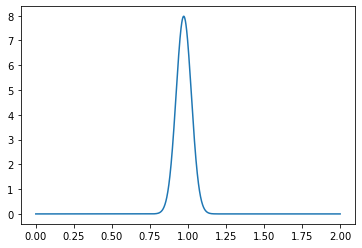

In [12]:
plot(z,pz)

In [13]:
cl=ccl.angular_cl(cosmo_ccl, tracers, tracers, ells_uncoupled)

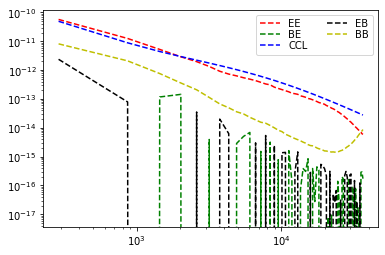

In [14]:

plt.figure()
plt.plot(ells_uncoupled, cl_22[0]/10, 'r--', label='EE')
plt.plot(ells_uncoupled, cl_22[1], 'g--',label='BE')
plt.plot(ells_uncoupled, cl, 'b--',label='CCL')
plt.plot(ells_uncoupled, -cl_22[2], 'k--',label='EB')
plt.plot(ells_uncoupled, cl_22[3], 'y--',label='BB')
plt.legend(loc='upper right', ncol=2, labelspacing=0.1)
plt.loglog()
plt.show()